In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('each_match_records.csv')

Index(['season', 'date', 'match_number', 'match_type', 'venue', 'location',
       'team1', 'team2', 'toss_won', 'toss_decision', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'man_of_match'],
      dtype='object')

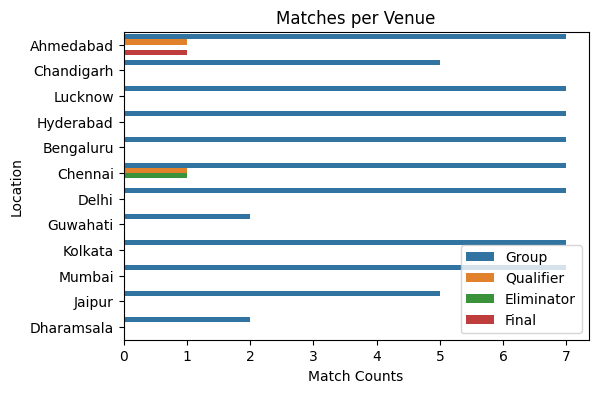

In [97]:
# (1) How matches were distributed across different locations. Top places like Ahmedabad, Bangalore, Delhi and Mumbai were favourites.
plt.figure(figsize=(6, 4))
sns.countplot(y='location', hue='match_type', data=df)
plt.title('Matches per Venue')
plt.xlabel('Match Counts')
plt.ylabel('Location')
plt.legend(loc='lower right')
plt.show()

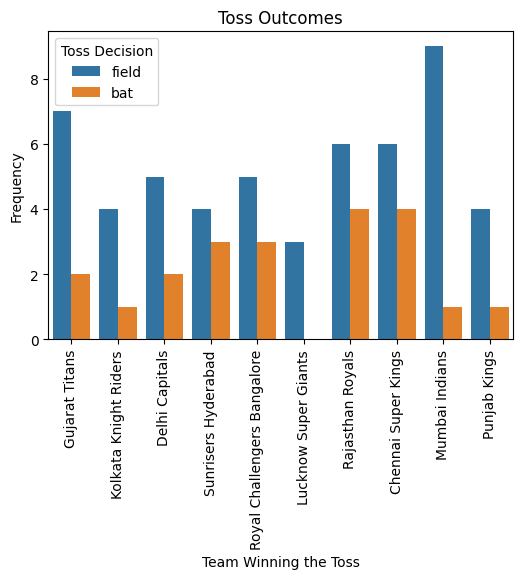

In [104]:
# (2) How do teams proceed after winning the toss. It seems last year everyone wanted to bowl first.
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_won', hue='toss_decision', data=df)
plt.title('Toss Outcomes')
plt.xlabel('Team Winning the Toss')
plt.ylabel('Frequency')
plt.legend(title='Toss Decision', loc='upper left')
plt.xticks(rotation=90)
plt.show()

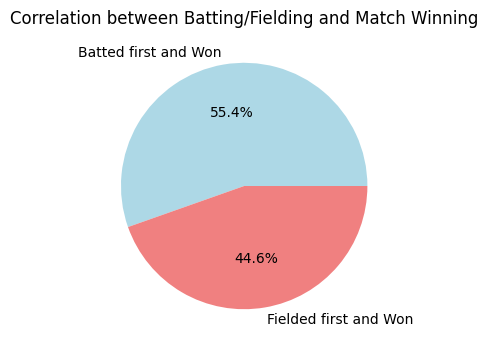

In [116]:
# (3) Correlation between batting/bowling first and match winning
df_bat_first_win_1 = df[(df['toss_won'] == df['winner']) & (df['toss_decision'] == 'bat')]
df_bat_first_win_2 = df[(df['toss_won'] != df['winner']) & (df['toss_decision'] == 'field')]

relevant_count = len(df_bat_first_win_1) + len(df_bat_first_win_2)
total_count = len(df)

labels = ['Batted first and Won', 'Fielded first and Won']
sizes = [relevant_count, total_count - relevant_count]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Correlation between Batting/Fielding and Match Winning')
plt.show()

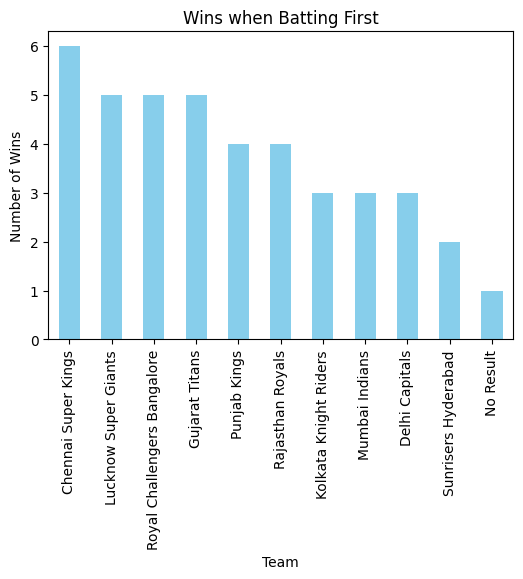

In [136]:
# (4) How individual teams performed when they batted first
df_bat_first_win = df[((df['toss_won'] == df['winner']) & (df['toss_decision'] == 'bat')) | ((df['toss_won'] != df['winner']) & (df['toss_decision'] == 'field'))]
counts = df_bat_first_win['winner'].value_counts()
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color='skyblue')
plt.title('Wins when Batting First')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

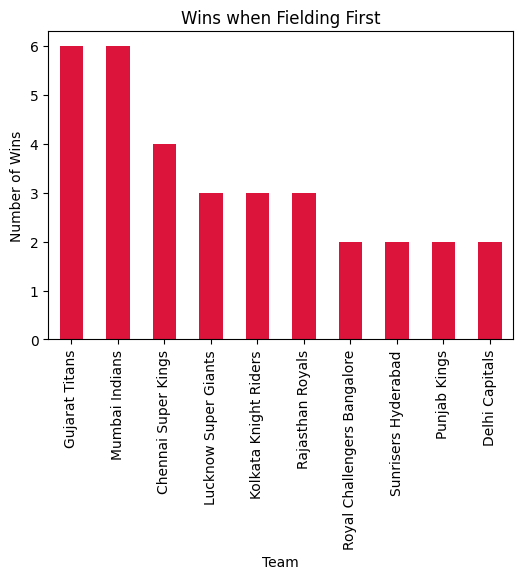

In [137]:
# (5) How individual teams performed when they fielded first
df_field_first_win = df[((df['toss_won'] == df['winner']) & (df['toss_decision'] == 'field')) | ((df['toss_won'] != df['winner']) & (df['toss_decision'] == 'bat'))]
counts = df_field_first_win['winner'].value_counts()
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color='crimson')
plt.title('Wins when Fielding First')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

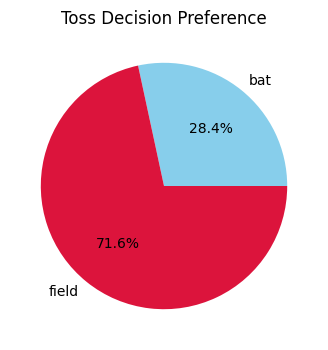

In [138]:
# (6) How teams proceeded after winning the toss
plt.figure(figsize=(4, 4))
toss_decision_counts = df.groupby('toss_decision').size()
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'crimson'])
plt.title('Toss Decision Preference')
plt.show()

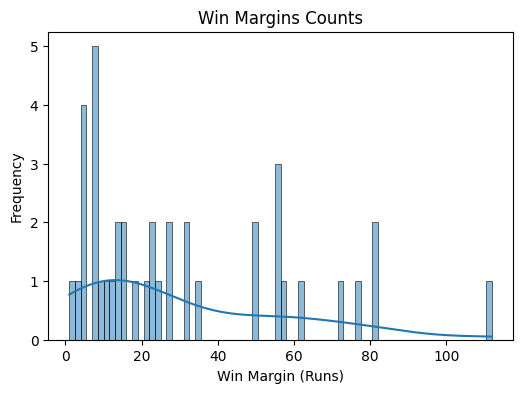

In [156]:
# (7) Win margin by runs. Most of the matches are won by a difference of less than 40 runs.
plt.figure(figsize=(6, 4))
sns.histplot(df['winner_runs'].dropna(), bins=len(df), kde=True)
plt.title('Win Margins Counts')
plt.xlabel('Win Margin (Runs)')
plt.ylabel('Frequency')
plt.show()

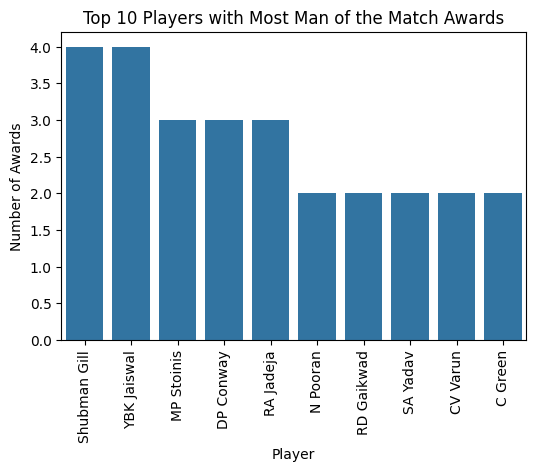

In [163]:
# (8) Best Performers: Who won most man of the match awards
plt.figure(figsize=(6, 4))
sns.countplot(x='man_of_match', data=df, order=df['man_of_match'].value_counts().index[:10])
plt.title('Top 10 Players with Most Man of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.show()

29
Nitin Menon              11
AK Chaudhary             11
VK Sharma                11
RJ Tucker                10
KN Ananthapadmanabhan    10
J Madanagopal            10
VM Dhokre                 9
M Krishnadas              9
Abhijit Bhattacharya      9
PM Joshi                  9
A Bengeri                 9
P Joshi                   9
M Kuppuraj                8
Mohamad Rafi              8
CB Gaffaney               8
NA Patwardhan             7
BNJ Oxenford              7
Vinod Seshan              7
A Totre                   6
GR Sadashiv Iyer          6
MV Saidharshan Kumar      6
MA Gough                  6
A Nand Kishore            6
UV Gandhe                 5
Navdeep Singh             5
HAS Khalid                5
R Pandit                  5
YC Barde                  5
Tapan Sharma              5
Name: count, dtype: int64


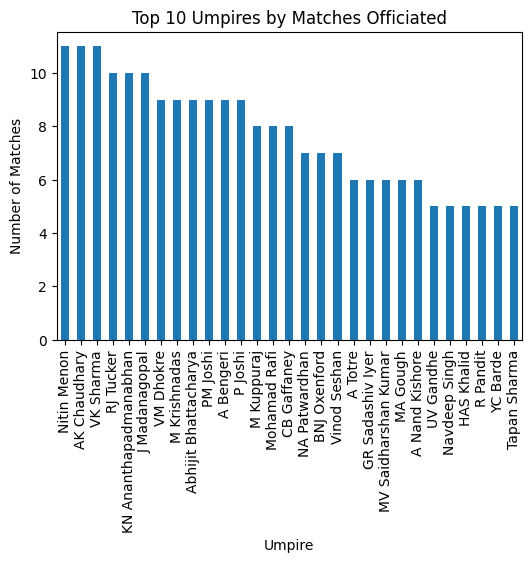

In [176]:
# (9) Most consistent umpires who were part of the most match
temp = pd.concat([df['umpire1'], df['umpire2'], df['reserve_umpire']])
print(len(temp.unique()))
umpire_counts = pd.concat([df['umpire1'], df['umpire2'], df['reserve_umpire']]).value_counts()
print(umpire_counts)
plt.figure(figsize=(6, 4))
# umpire_counts.head(10).plot(kind='bar')
umpire_counts.plot(kind='bar')
plt.title('Top 10 Umpires by Matches Officiated')
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()
